# Inicializar

In [1]:
from Modelos.base_model import base_model
from Modelos.serie_model import serie_model
from Modelos.parallel_model import parallel_model
from Modelos.hybrid_model import hybrid_model
from utils.utils import mostrarResultadosTabla, generate_equidistant_list, graficar_costos_minimizados, graficar_costos_totales

from config import *

import math
import numpy as np

In [2]:
totalNodes = 5
baseModel = base_model(totalNodes)

Restricted license - for non-production use only - expires 2026-11-23


# Pruebas

## Required Reliabilities

In [3]:
seriesMinReliability = RELIABILITY_BY_NODE_TYPE[0] ** totalNodes
seriesMaxReliability = RELIABILITY_BY_NODE_TYPE[2] ** totalNodes
seriesRequiredReliabilities = generate_equidistant_list(seriesMinReliability, seriesMaxReliability, NUM_EQUIDISTANT_VALUES)

In [4]:
parallelMinReliability = 1 - ((1 - RELIABILITY_BY_NODE_TYPE[0]) ** totalNodes)
parallelMaxReliability = 1 - ((1 - RELIABILITY_BY_NODE_TYPE[2]) ** totalNodes)
parallelRequiredReliabilities = generate_equidistant_list(parallelMinReliability, parallelMaxReliability, NUM_EQUIDISTANT_VALUES)
parallelRequiredReliabilities = [value for value in parallelRequiredReliabilities if value < 1]

In [5]:
hybridMaxReliability = RELIABILITY_BY_NODE_TYPE[2] if totalNodes < 6 else 1
hybridRequiredReliabilities = generate_equidistant_list(0.8, hybridMaxReliability, NUM_EQUIDISTANT_VALUES)

## Serie

In [6]:
# Crear y optimizar el modelo en serie
try:
    seriesMinCost, seriesVars, seriesModel = serie_model(baseModel, totalNodes, seriesRequiredReliabilities[-1])
    mostrarResultadosTabla(totalNodes, seriesMinCost, seriesVars)

except Exception as e:
    print(f"Error: {e}")

Cantidad de Nodos: 5
Resultado de la Optimización:
Costo Total: 190.0
Costo nodos: 150.0
Costo enlaces: 40.0
Nodos activos (x):
   Low Cost  Mid Cost  High Cost
1         0         0          1
2         0         0          1
3         0         0          1
4         0         0          1
5         0         0          1


Gráfica de serie con 5 nodos


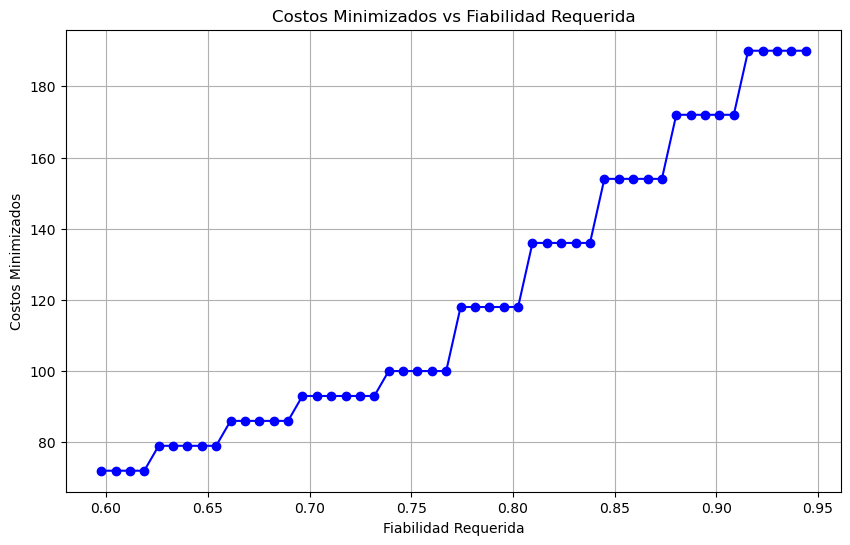

In [7]:
# Graficar los costos minimizados para cada confiabilidad requerida
try:
	serieMinimizedCosts = []
	for reqReliability in seriesRequiredReliabilities:
		minCost, seriesVars, seriesModel = serie_model(baseModel, totalNodes, reqReliability)
		serieMinimizedCosts.append(minCost)
	print(f"Gráfica de serie con {totalNodes} nodos")
	graficar_costos_minimizados(seriesRequiredReliabilities, serieMinimizedCosts)
except ValueError as e:
    print(f"Error: {e}")

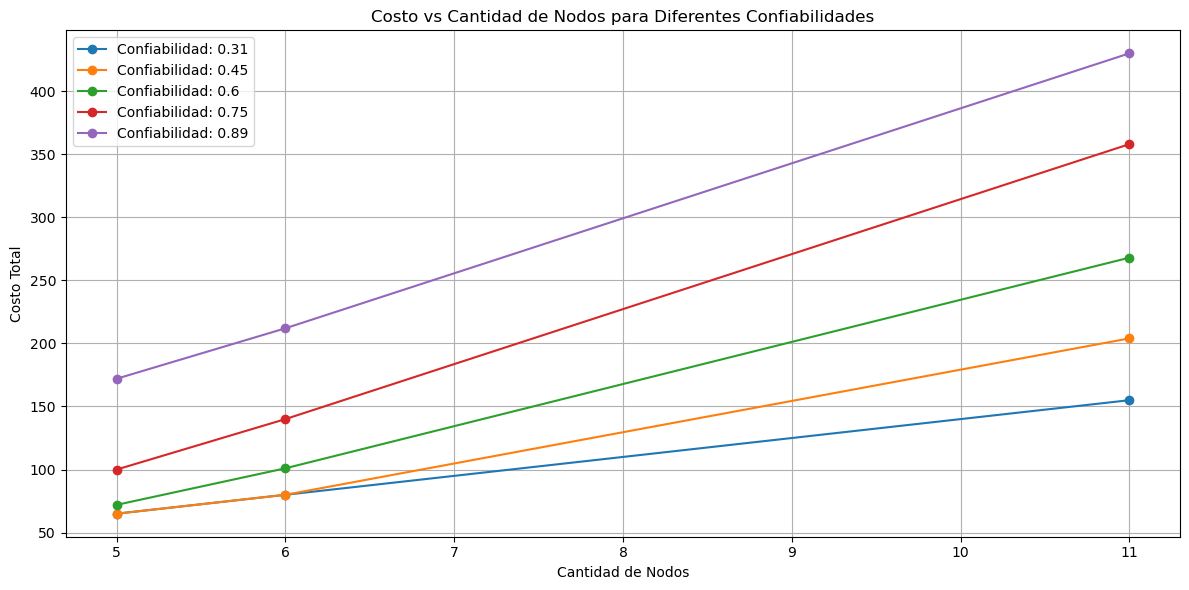

In [8]:
confiabilidades = [0.31,0.45,0.60,0.75,0.89]

##### entre 0.8 y 0.89
# 0.32 - 0.59: 5 nodos
# 0.26 - 0.53: 6 nodos
# 0.08 - 0.31: 11 nodos

##### entre 0.9 y 0.99
# 0.59 - 0.95: 5 nodos
# 0.53 - 0.94: 6 nodos
# 0.31 - 0.89: 11 nodos

nodos = [5,6,11]

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = serie_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")

## Paralelo

In [9]:
# Crear y optimizar el modelo en paralelo
try:
	parallelMinCost, parallelVars, parallelModel = parallel_model(baseModel, totalNodes, parallelRequiredReliabilities[-1])
	print("Confiabilidad requerida: ", parallelRequiredReliabilities[-1])
	mostrarResultadosTabla(totalNodes, parallelMinCost, parallelVars)
except Exception as e:
    print(f"Error: {e}")

Confiabilidad requerida:  0.999999803824
Cantidad de Nodos: 5
Resultado de la Optimización:
Costo Total: 171.0
Costo nodos: 71.0
Costo enlaces: 100.0
Nodos activos (x):
   Low Cost  Mid Cost  High Cost
1         0         1          0
2         0         1          0
3         0         1          0
4         0         0          1
5         1         0          0


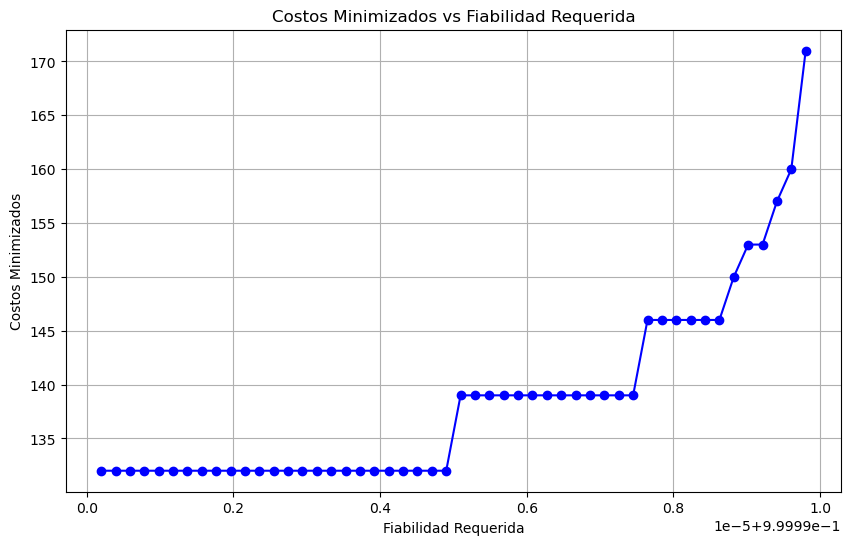

In [10]:
# Graficar los costos minimizados para cada confiabilidad requerida
try:
	parallelMinimizedCosts = []
	for reqReliability in parallelRequiredReliabilities:
		minCost, parallelVars, parallelModel = parallel_model(baseModel, totalNodes, reqReliability)
		parallelMinimizedCosts.append(minCost)
	log_transformed_reliabilities = parallelRequiredReliabilities
	# log_transformed_reliabilities = np.log10(np.array(parallelRequiredReliabilities))
	graficar_costos_minimizados(log_transformed_reliabilities, parallelMinimizedCosts)
except ValueError as e:
	print(f"Error: {e}")

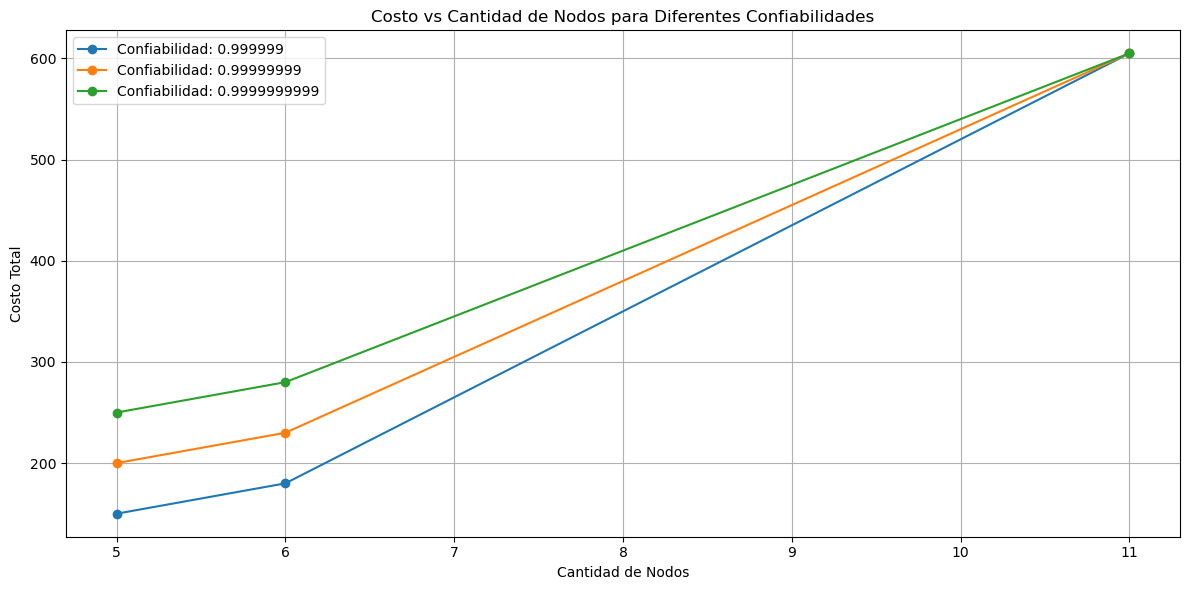

In [11]:
confiabilidades = [0.999999,0.99999999,0.9999999999]

##### entre 0.9 y 0.99
# 0.99999 - 0.9999999999: 5 nodos
# 0.999999 - 0.999999999999: 6 nodos
# 0.99999999999 - 1: 11 nodos

nodos = [5,6,11]

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = parallel_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")

## Hibrido

In [12]:
# Crear y optimizar el modelo híbrido
try:
    reqRel = hybridRequiredReliabilities[-1]
    hybridMinCost, hybridVars, hybridModel = hybrid_model(baseModel, totalNodes, reqRel)
    print("Confiabilidad requerida:", reqRel)
    mostrarResultadosTabla(totalNodes, hybridMinCost, hybridVars, "hibrido")
    confiabilidadAlcanzada = math.exp(hybridVars["TotalReliability"])
    print("Confiabilidad alcanza:", str(confiabilidadAlcanzada))
    # for var in hybridVars:
    #     if not var.startswith("x") and not var.startswith("y"):
    #         print(f"Variable {var}: {hybridVars[var]}")
except Exception as e:
    print(f"Error: {e}")

Confiabilidad requerida: 0.986274509804
Cantidad de Nodos: 5
Resultado de la Optimización:
Costo Total: 120.0
Costo nodos: 50.0
Costo enlaces: 70.0
Nodos activos (x):
   Low Cost  Mid Cost  High Cost
1         1         0          0
2         1         0          0
3         1         0          0
4         1         0          0
5         0         0          1
Nodos activos (y):
   Subred 0  Subred 1
1         0         1
2         0         1
3         0         1
4         0         1
5         1         0
Confiabilidad alcanza: 0.9899009999999906


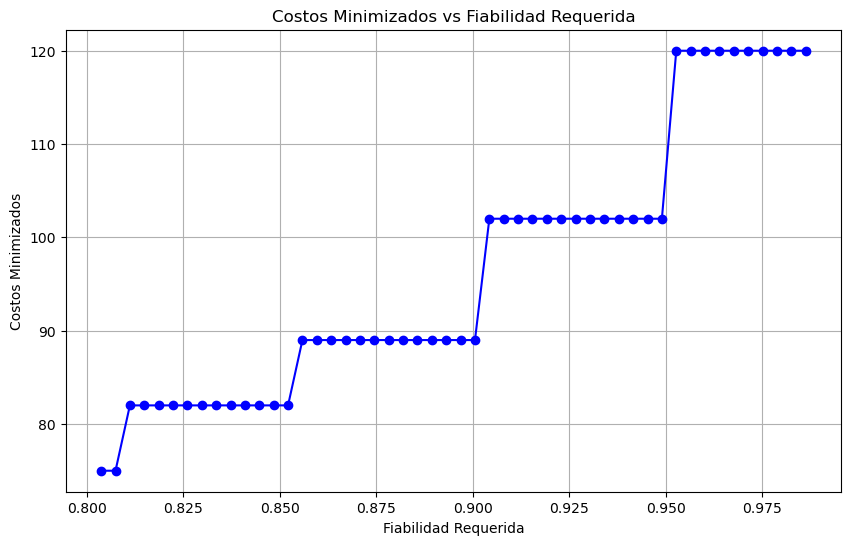

In [13]:
# Graficar los costos minimizados para cada confiabilidad requerida
try:
    hybridMinimizedCosts = []
    for reqReliability in hybridRequiredReliabilities:
        minCost, hybridVars, hybridModel = hybrid_model(baseModel, totalNodes, reqReliability)
        hybridMinimizedCosts.append(minCost)
    graficar_costos_minimizados(hybridRequiredReliabilities, hybridMinimizedCosts)
except ValueError as e:
    print(f"Error: {e}")

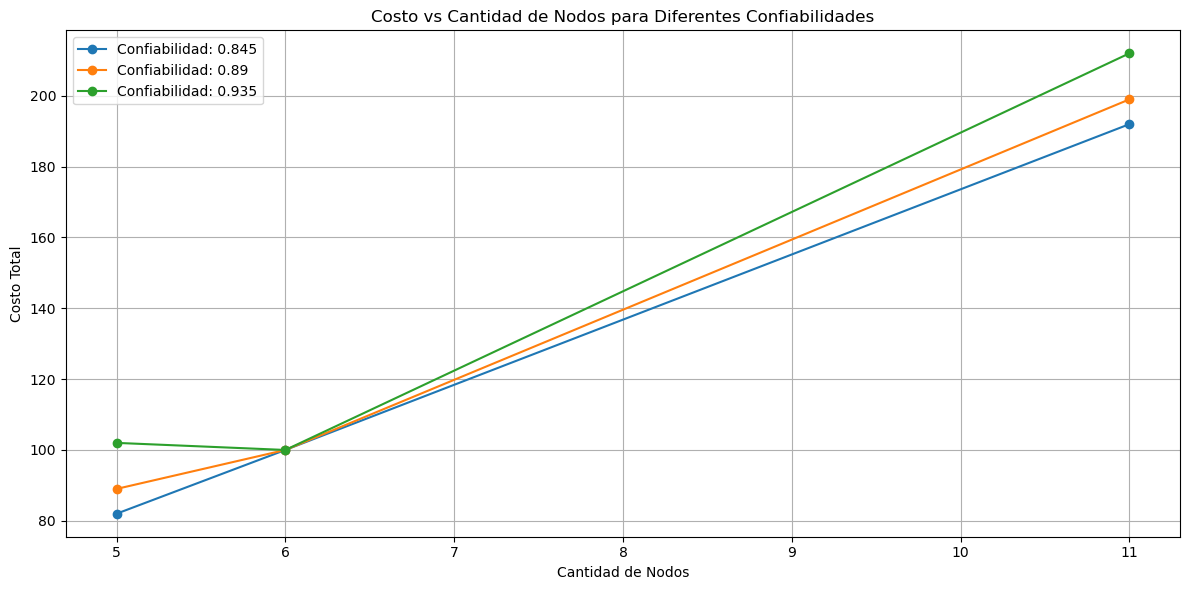

In [33]:
confiabilidades = generate_equidistant_list(0.8, 0.98, 3)

nodos = [5,6,11]

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = hybrid_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")

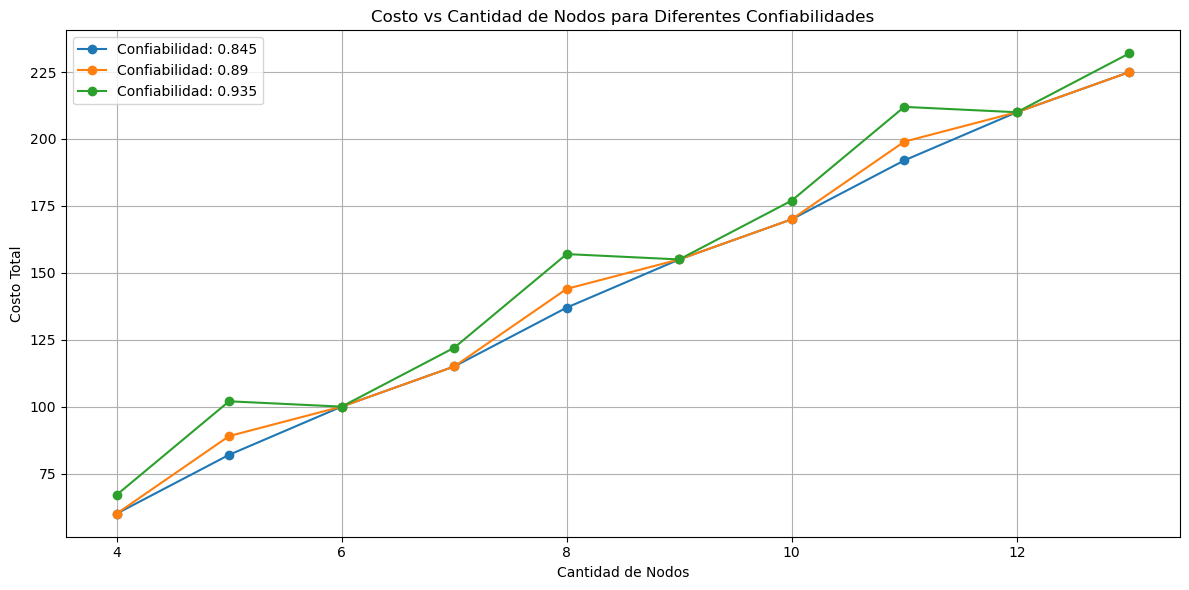

In [32]:
confiabilidades = generate_equidistant_list(0.8, 0.98, 3)

nodos = [4,5,6,7,8,9,10,11,12,13]

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = hybrid_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")

# Gráficas nuevas

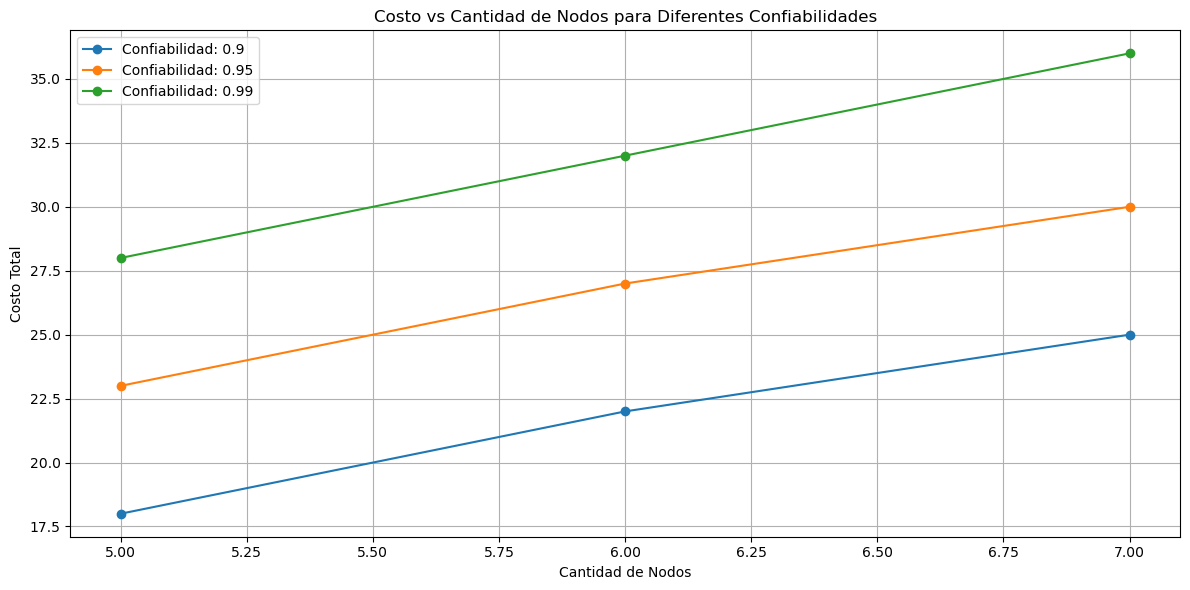

In [ ]:
from utils.utils import graficar_costos_totales
# Datos de prueba
confiabilidades = [0.90, 0.95, 0.99]
cantidades_nodos = [5, 6, 7]

costos_totales = [
    18, 22, 25,     # para 0.90
    23, 27, 30,     # para 0.95
    28, 32, 36      # para 0.99
]

graficar_costos_totales(confiabilidades, cantidades_nodos, costos_totales)

In [ ]:

# Listas de entrada (en el mismo orden que se usaron en product(confiabilidades, cantidades_nodos))
confiabilidades = [0.55, 0.75, 0.89]
cantidades_nodos = [5, 6, 11]

# Lista de variables de decisión simuladas, como las retornaría un modelo (solo para este ejemplo)
decision_sets = [
    {'x[0,0]': 1.0, 'x[1,0]': 1.0, 'x[2,1]': 1.0, 'x[3,1]': 1.0, 'x[4,2]': 1.0},
    {'x[0,1]': 1.0, 'x[1,1]': 1.0, 'x[2,1]': 1.0, 'x[3,0]': 1.0, 'x[4,0]': 1.0, 'x[5,2]': 1.0},
    {'x[0,2]': 1.0, 'x[1,2]': 1.0, 'x[2,1]': 1.0, 'x[3,0]': 1.0, 'x[4,0]': 1.0, 'x[5,1]': 1.0, 'x[6,1]': 1.0, 'x[7,0]': 1.0, 'x[8,0]': 1.0, 'x[9,0]': 1.0, 'x[10,0]': 1.0},

    {'x[0,0]': 1.0, 'x[1,0]': 1.0, 'x[2,1]': 1.0, 'x[3,1]': 1.0, 'x[4,2]': 1.0},
    {'x[0,0]': 1.0, 'x[1,1]': 1.0, 'x[2,2]': 1.0, 'x[3,1]': 1.0, 'x[4,0]': 1.0, 'x[5,0]': 1.0},
    {'x[0,2]': 1.0, 'x[1,1]': 1.0, 'x[2,0]': 1.0, 'x[3,0]': 1.0, 'x[4,0]': 1.0, 'x[5,1]': 1.0, 'x[6,0]': 1.0, 'x[7,0]': 1.0, 'x[8,0]': 1.0, 'x[9,2]': 1.0, 'x[10,2]': 1.0},

    {'x[0,1]': 1.0, 'x[1,1]': 1.0, 'x[2,1]': 1.0, 'x[3,0]': 1.0, 'x[4,0]': 1.0},
    {'x[0,1]': 1.0, 'x[1,2]': 1.0, 'x[2,0]': 1.0, 'x[3,1]': 1.0, 'x[4,0]': 1.0, 'x[5,0]': 1.0},
    {'x[0,2]': 1.0, 'x[1,1]': 1.0, 'x[2,1]': 1.0, 'x[3,1]': 1.0, 'x[4,1]': 1.0, 'x[5,1]': 1.0, 'x[6,1]': 1.0, 'x[7,0]': 1.0, 'x[8,0]': 1.0, 'x[9,0]': 1.0, 'x[10,0]': 1.0},
]


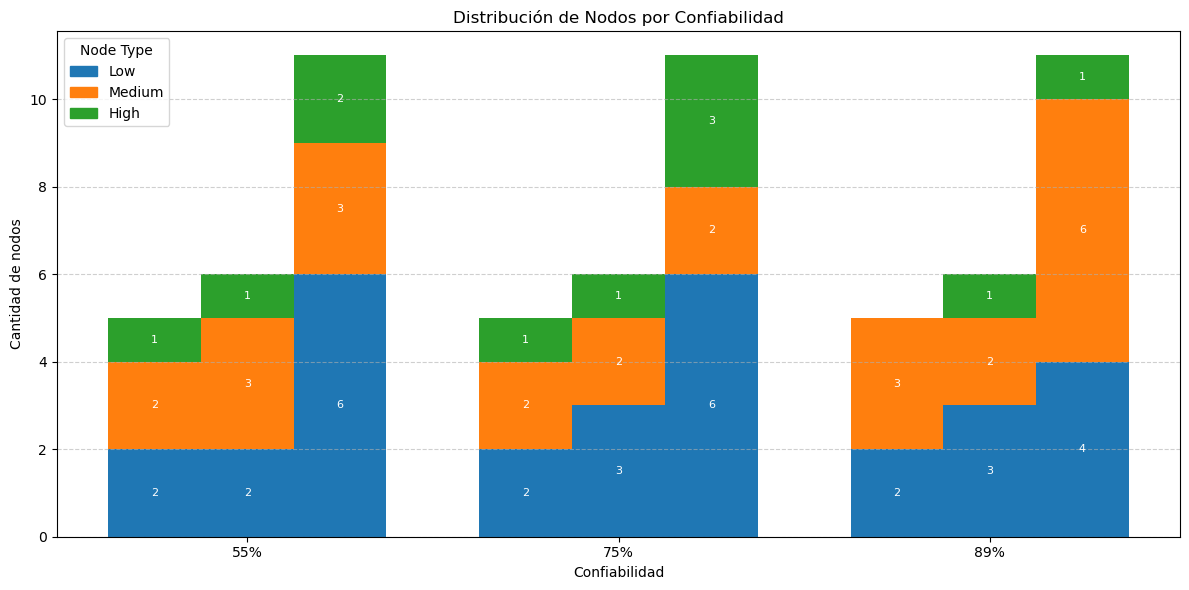

In [ ]:
from utils.utils import graficar_distribucion_apilada

graficar_distribucion_apilada(
    confiabilidades=confiabilidades,
    cantidades_nodos=cantidades_nodos,
    decision_sets=decision_sets
)
